# K-means Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat

## Computing the closest centroids

In [2]:
def findClosestCentroids(X, centroids):    
    idx=[]
    for i in range(len(X)):
        min_centroid = np.linalg.norm(X[i]-centroids[0])
        idx.append(0)
        for j in range(len(centroids)):
            if np.linalg.norm(X[i]-centroids[j]) < min_centroid :
                min_centroid = np.linalg.norm(X[i]-centroids[j])
                idx[i] = j
    
    return np.array(idx)

In [3]:
# Load an example dataset that we will be using
data = loadmat('datafile.mat')
data = np.array(data['X'])
# Select an initial set of centroids
K = 3   # 3 Centroids
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

# Find the closest centroids for the examples using the initial_centroids
idx = findClosestCentroids(data, initial_centroids)

print('Closest centroids for the first 3 examples:')
print(idx[:3])
print('(the closest centroids should be 0, 2, 1 respectively)')

Closest centroids for the first 3 examples:
[0 2 1]
(the closest centroids should be 0, 2, 1 respectively)


## Computing centroid means

In [4]:
def computeCentroids(X, idx, K):
    centroids = []
    for i in range(K):
        k_indexes = []
        for j in range(len(idx)):
            if idx[j] == i :
                k_indexes.append(j)
        centroids.append(np.mean(X[k_indexes,:],axis=0))
        k_indexes = []
    
    return np.array(centroids)

In [5]:
# Compute means based on the closest centroids found in the previous part.
centroids = computeCentroids(data, idx, K)

print('Centroids computed after initial finding of closest centroids:')
print(centroids)
print('\nThe centroids should be')
print('   [ 2.428301 3.157924 ]')
print('   [ 5.813503 2.633656 ]')
print('   [ 7.119387 3.616684 ]')

Centroids computed after initial finding of closest centroids:
[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]

The centroids should be
   [ 2.428301 3.157924 ]
   [ 5.813503 2.633656 ]
   [ 7.119387 3.616684 ]


### Kmeans implementation

In [6]:
def init_centroids(X,K):
    centroids = []
    m = np.shape(X)[0]
    for _ in range(K):
        r = np.random.randint(0, m-1)
        centroids.append(X[r])
    return np.array(centroids)

In [7]:
def k_means(X,K,iterations=10000):
    centroids = init_centroids(X,K)
    idx = findClosestCentroids(X,centroids)
    for _ in range(iterations):
        centroids = computeCentroids(X, idx, K)
        idx = findClosestCentroids(X,centroids)

    return idx

In [8]:
clusters = k_means(data,3,5000)

<AxesSubplot:>

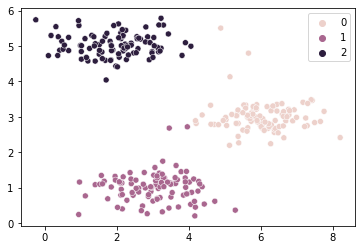

In [9]:
sns.scatterplot(x=data[:,0],y=data[:,1],hue=clusters)